In [ ]:
# # 빅데이터 분석기사: 계층적 군집 (Hierarchical Clustering) 상세 설명
#
# # ---
#
# ## 1. 기본 원리 및 개념
#
# # - 군집들을 **트리 구조(Tree Structure)**인 **덴드로그램 (Dendrogram)** 형태로 표현하는 기법이다.
# # - 데이터 객체 간의 거리를 측정하여 가까운 것들을 단계적으로 묶거나(병합) 분리(분할)한다.
# # - **K(군집의 개수)를 사전에 미리 지정할 필요가 없다.** (덴드로그램을 보고 적절한 K를 나중에 결정)
#
# # ---
#
# ## 2. 계층적 군집의 두 가지 방법론
#
# ### (1) 병합적 계층 군집 (Agglomerative, Bottom-up)
#
# # - **과정**: 개별 데이터 객체 각각을 하나의 군집으로 시작하여, 가까운 군집끼리 **순차적으로 병합**해 나간다.
# # - **결과**: 최종적으로 모든 객체가 하나의 큰 군집이 될 때까지 진행된다.
# # - **특징**: 작은 단위에서 시작하여 점점 커지는 '상향식(Bottom-up)' 방식이다.
#
# ### (2) 분할적 계층 군집 (Divisive, Top-down)
#
# # - **과정**: 모든 객체를 포함하는 하나의 큰 군집에서 시작하여, 유사성이 가장 낮은 객체나 군집을 **순차적으로 분리**해 나간다.
# # - **결과**: 최종적으로 모든 객체가 개별 군집이 될 때까지 진행된다.
# # - **특징**: 큰 단위에서 시작하여 점점 작아지는 '하향식(Top-down)' 방식이며, DIANA 등이 대표적이다.
#
# # ---
#
# ## 3. 군집 간 거리 측정 기준 (연결법, Linkage Methods)
#
# # 병합적 군집에서 두 개의 군집($C_i$, $C_j$)을 하나의 군집으로 합칠 때, 이 두 군집 간의 거리를 정의하는 방법.
#
# # 1. **최단 연결법 (Single Linkage, 단일 연결법)**
# # - 정의: 두 군집에 속한 객체들 간의 **최소 거리**를 군집 간의 거리로 정의한다.
# # - 특징: 사슬 모양(Chaining Effect)의 군집이 형성되기 쉽다.
#
# # 2. **최장 연결법 (Complete Linkage, 완전 연결법)**
# # - 정의: 두 군집에 속한 객체들 간의 **최대 거리**를 군집 간의 거리로 정의한다.
# # - 특징: 군집이 조밀하고 구형(Sphere)으로 형성되는 경향이 있다.
#
# # 3. **평균 연결법 (Average Linkage)**
# # - 정의: 두 군집에 속한 모든 객체 쌍의 **평균 거리**를 군집 간의 거리로 정의한다.
# # - 특징: 최단/최장 연결법의 단점을 보완하며 균형 잡힌 군집을 형성하려는 경향이 있다.
#
# # 4. **와드 연결법 (Ward's Linkage)**
# # - 정의: 두 군집을 합칠 때, **군집 내 오차제곱합(SSE, Sum of Squared Errors)의 증가분**을 최소화하도록 군집을 병합한다.
# # - 특징: 군집 내 분산을 가장 작게 유지하려 하며, K-Means와 유사하게 작동한다.
#
# # ---
#
# ## 4. 덴드로그램 (Dendrogram)
#
# # - 역할: 계층적 군집화의 결과를 시각적으로 표현하는 트리 구조의 그림이다.
# # - 해석:
# #   - X축: 개별 객체 (데이터 포인트)
# #   - Y축: 군집 간의 거리 (유사성 척도)
# # - 활용: 적절한 높이에서 수평선을 잘라(Cut) 교차하는 가지의 수만큼을 **최적의 군집 수(K)**로 결정할 수 있다.
#

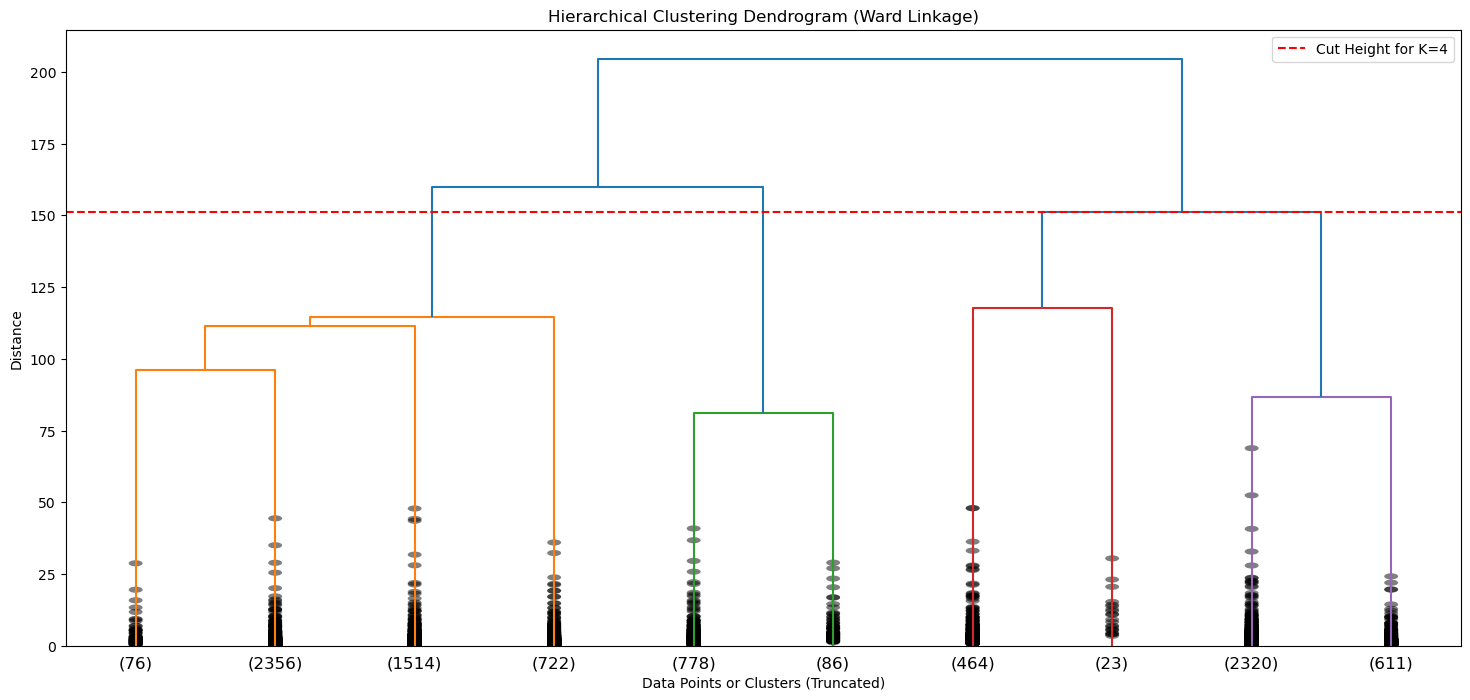

1. 덴드로그램 시각화 완료 (K=4로 자른 선 표시)
--------------------------------------------------


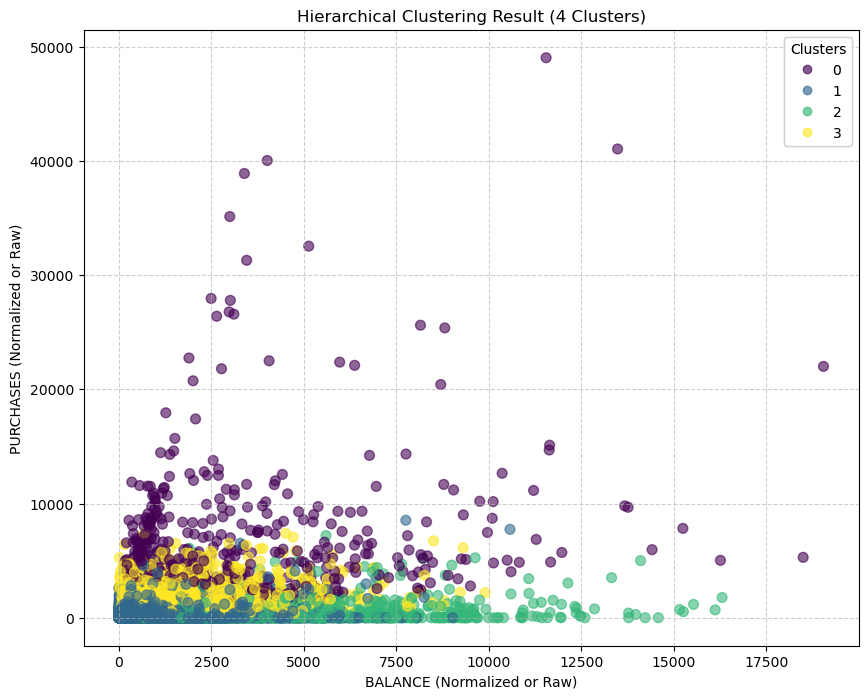

2. 군집 산점도 시각화 완료 (BALANCE vs PURCHASES)
--------------------------------------------------


In [1]:
# ------------------------------
# CC GENERAL.csv 파일 기반 계층적 군집 시각화 코드
# ------------------------------

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster # fcluster 추가
import matplotlib.pyplot as plt
import numpy as np

# (이전 단계 코드가 정상 실행되었다고 가정하고 데이터 로드 및 전처리는 생략합니다.)

# 데이터 로드 및 전처리 (재현을 위해 필수적인 부분만 다시 실행)
file_path = "CC GENERAL.csv"
df = pd.read_csv(file_path)
df_model = df.drop('CUST_ID', axis=1)
df_model.fillna(df_model.mean(), inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

# 덴드로그램 분석으로 최적 K=4를 가정
optimal_k = 4
# K=4로 AgglomerativeClustering을 실행하여 군집 레이블을 df_model에 할당
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
df_model['Cluster'] = agg_clustering.fit_predict(X_scaled)


## 1. 덴드로그램 시각화 (Dendrogram Visualization)
# ----------------------------------------------------

# linkage 함수를 사용하여 군집 간 거리를 계산하고 병합 순서 정의
linked = linkage(X_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')

# 덴드로그램을 시각화합니다.
# truncate_mode='lastp', p=10: 너무 많은 객체를 표시하면 복잡하므로, 마지막 10개의 병합 단계만 표시합니다.
# show_contracted=True: 압축된 노드의 수를 표시합니다.
dendrogram(linked,
           orientation='top',
           truncate_mode='lastp',
           p=10,
           show_leaf_counts=True,
           distance_sort='descending',
           show_contracted=True)

# 덴드로그램을 수평으로 자르는 선을 추가 (K=4로 자르는 예시)
# linked[-(optimal_k-1), 2]는 K=4일 때 자를 높이(거리)를 대략적으로 나타냅니다.
cut_height = linked[-(optimal_k-1), 2] if len(linked) >= optimal_k - 1 else 0
plt.axhline(y=cut_height, color='r', linestyle='--', label=f'Cut Height for K={optimal_k}')

plt.xlabel('Data Points or Clusters (Truncated)')
plt.ylabel('Distance')
plt.legend()
plt.show()

print("1. 덴드로그램 시각화 완료 (K=4로 자른 선 표시)")
print("-" * 50)


## 2. 군집 결과 시각화 (Scatter Plot)
# ----------------------------------------------------

# 고차원 데이터를 2차원으로 시각화하기 위해 주성분 분석(PCA)을 사용하는 것이 일반적이지만,
# 여기서는 간단하게 이해를 돕기 위해 'BALANCE'와 'PURCHASES' 두 변수만을 사용하여 산점도를 그립니다.

# 시각화할 두 변수 선택
feature_x = 'BALANCE'
feature_y = 'PURCHASES'

plt.figure(figsize=(10, 8))
# 군집 레이블(Cluster)을 색상으로 사용하여 산점도 생성
scatter = plt.scatter(df_model[feature_x],
                      df_model[feature_y],
                      c=df_model['Cluster'],
                      cmap='viridis',
                      s=50,
                      alpha=0.6)

plt.title(f'Hierarchical Clustering Result ({optimal_k} Clusters)')
plt.xlabel(feature_x + ' (Normalized or Raw)')
plt.ylabel(feature_y + ' (Normalized or Raw)')

# 범례 추가
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
plt.gca().add_artist(legend1)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"2. 군집 산점도 시각화 완료 ({feature_x} vs {feature_y})")
print("-" * 50)